<a href="https://colab.research.google.com/github/marxav/ann_101/blob/master/ann_101_pytorch_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Python librairies

In [ ]:
# package to store and manipulate neural-network input and output data
import numpy as np

# package to graphically display any data
import matplotlib.pyplot as plt

# package to manipulate neural-network models
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# the code is compatible with Tensflow v1.4.0
print("Pytorch version:", torch.__version__)

Pytorch version: 1.5.1


In [ ]:
# To check whether you code will use a GPU or not, uncomment the following two
# lines of code. You should either see:
# * an "XLA_GPU", 
# * or better a "K80" GPU
# * or even better a "T100" GPU

if torch.cuda.is_available():
  print('GPU support (%s)' % torch.cuda.get_device_name(0))
else:
  print('no GPU support')

GPU support (GeForce RTX 2080 Ti)


In [ ]:
import time

# trivial "debug" function to display the duration between time_1 and time_2
def get_duration(time_1, time_2):
  duration_time = time_2 - time_1
  m, s = divmod(duration_time, 60)
  h, m = divmod(m, 60)
  s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
  duration = "duration: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s)
  return duration

## Get the data

In [ ]:
X_train = np.array([0.765,0.838,0.329,0.277,0.45,0.833,0.44,0.634,0.351,0.784,0.589,0.816,0.352,0.591,0.04,0.38,0.816,0.732,0.32,0.597,0.908,0.146,0.691,0.75,0.568,0.866,0.705,0.027,0.607,0.793,0.864,0.057,0.877,0.164,0.729,0.291,0.324,0.745,0.158,0.098,0.113,0.794,0.452,0.765,0.983,0.001,0.474,0.773,0.155,0.875,])
Y_train = np.array([6.322,6.254,3.224,2.87,4.177,6.267,4.088,5.737,3.379,6.334,5.381,6.306,3.389,5.4,1.704,3.602,6.306,6.254,3.157,5.446,5.918,2.147,6.088,6.298,5.204,6.147,6.153,1.653,5.527,6.332,6.156,1.766,6.098,2.236,6.244,2.96,3.183,6.287,2.205,1.934,1.996,6.331,4.188,6.322,5.368,1.561,4.383,6.33,2.192,6.108,])
X_val = np.array([0.329,0.528,0.323,0.952,0.868,0.931,0.69,0.112,0.574,0.421,0.972,0.715,0.7,0.58,0.69,0.163,0.093,0.695,0.493,0.243,0.928,0.409,0.619,0.011,0.218,0.647,0.499,0.354,0.064,0.571,0.836,0.068,0.451,0.074,0.158,0.571,0.754,0.259,0.035,0.595,0.245,0.929,0.546,0.901,0.822,0.797,0.089,0.924,0.903,0.334,])
Y_val = np.array([3.221,4.858,3.176,5.617,6.141,5.769,6.081,1.995,5.259,3.932,5.458,6.193,6.129,5.305,6.081,2.228,1.912,6.106,4.547,2.665,5.791,3.829,5.619,1.598,2.518,5.826,4.603,3.405,1.794,5.23,6.26,1.81,4.18,1.832,2.208,5.234,6.306,2.759,1.684,5.432,2.673,5.781,5.019,5.965,6.295,6.329,1.894,5.816,5.951,3.258,])

In [ ]:
print('X_train contains %d samples' % X_train.shape)
print('Y_train contains %d samples' % Y_train.shape)
print('')
print('X_val contains %d samples' % X_val.shape)
print('Y_val contains %d samples' % Y_val.shape)

X_train contains 50 samples
Y_train contains 50 samples

X_val contains 50 samples
Y_val contains 50 samples


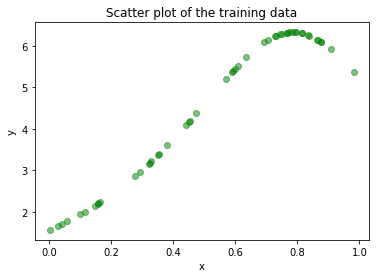

In [ ]:
# Graphically display our training data
plt.scatter(X_train, Y_train, color='green', alpha=0.5)
plt.title('Scatter plot of the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

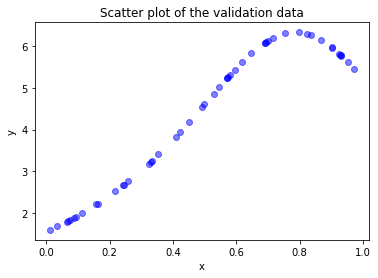

In [ ]:
# Graphically display our test data
plt.scatter(X_val, Y_val, color='blue', alpha=0.5)
plt.title('Scatter plot of the validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Build the artificial neural-network

In [ ]:
from collections import OrderedDict

def create_model():
  
  # This returns a tensor
  model = nn.Sequential(OrderedDict([
      ('hidden_layer_1', nn.Linear(1,8)), ('hidden_layer_1_act', nn.ReLU()),
      ('hidden_layer_2', nn.Linear(8,8)), ('hidden_layer_2_act', nn.ReLU()),
      ('output_layer', nn.Linear(8,1))
  ]))

  return model

In [ ]:
ann_model = create_model()

In [ ]:
# Display a textual summary of the newly created model
# Pay attention to size (a.k.a. total parameters) of the network
print(ann_model)


Sequential(
  (hidden_layer_1): Linear(in_features=1, out_features=8, bias=True)
  (hidden_layer_1_act): ReLU()
  (hidden_layer_2): Linear(in_features=8, out_features=8, bias=True)
  (hidden_layer_2_act): ReLU()
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
print('params:', sum(p.numel() for p in ann_model.parameters()))
print('trainable_params:', sum(p.numel() for p in ann_model.parameters() if p.requires_grad))

params: 97
trainable_params: 97


## Train the artificial neural-network model

In [ ]:
# Object for storing training results (similar to Tensorflow object)
class Results:

    history = {
        'train_loss': [],
        'valid_loss': []
    }

In [ ]:
# No Pytorch model.fit() function as it is the case in Tensorflow
# but we can implement it by ourselves.

def fit(ann_model, X_train, Y_train, verbose=False,
        batch_size=1, epochs=500, validation_test=None):

  X_train  = torch.from_numpy(X_train).unsqueeze(1).float()
  Y_train  = torch.from_numpy(Y_train).unsqueeze(1).float()

  if validation_test != None:
      X_valid =  torch.from_numpy(validation_test[0]).unsqueeze(1).float()
      Y_valid =  torch.from_numpy(validation_test[1]).unsqueeze(1).float()

  loss_fn = nn.MSELoss()
  optimizer = optim.SGD(ann_model.parameters(), lr=0.02)

  results = Results()
  
  for epoch in range(0, epochs):

    Ŷ_train = ann_model(X_train)
    train_loss = loss_fn(Ŷ_train, Y_train)
    
    if validation_test != None:
        Ŷ_valid = ann_model(X_valid)
        valid_loss = loss_fn(Ŷ_valid, Y_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    results.history['train_loss'].append(float(train_loss))
    if validation_test != None:
        results.history['valid_loss'].append(float(valid_loss))

    if verbose:
      if epoch % 1000 == 0:
        if validation_test != None:
            print('epoch:%d, train_loss:%.3f, valid_loss:%.3f' \
              % (epoch, float(train_loss), float(valid_loss)))
        else:
            print('epoch:%d, train_loss:%.3f' \
              % (epoch, float(valid_loss)))
    
  return results

In [ ]:
# Train the model with the input data and the output_values

# validation_split=0.2 means that 20% of the X_train samples will be used
# for a validation test and that "only" 80% will be used for training

t0 = time.time()
results = fit(ann_model, X_train, Y_train, verbose=True,
              batch_size=1, epochs=4000, validation_test=(X_val, Y_val))
t1 = time.time()
print('training_%s' % get_duration(t0, t1))

epoch:0, train_loss:21.784, valid_loss:19.622
epoch:1000, train_loss:0.067, valid_loss:0.118
epoch:2000, train_loss:0.038, valid_loss:0.065
epoch:3000, train_loss:0.023, valid_loss:0.038
training_duration: 00:00:02


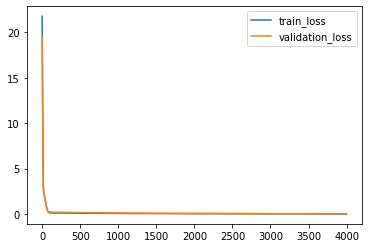

In [ ]:
plt.plot(results.history['train_loss'], label = 'train_loss')
plt.plot(results.history['valid_loss'], label = 'validation_loss')
plt.legend()
plt.show()

## Evaluate the model

In [ ]:
# No Pytorch model.evaluate() function as it is the case in Tensorflow
# but we can implement it by ourselves.

def evaluate(ann_model, X_, Y_, verbose=False):
  
  X = torch.from_numpy(X_).unsqueeze(1).float()
  Y = torch.from_numpy(Y_).unsqueeze(1).float()

  Ŷ = ann_model(X)

  # let's calculate the mean square error
  # (could also be calculated with sklearn.metrics.mean_squared_error()
  # or we could also calculate other errors like in 5% ok
  mean_squared_error = torch.sum((Ŷ - Y) ** 2)/Y.shape[0]
  if verbose:
    print("mean_squared_error:%.3f" % mean_squared_error)
  return mean_squared_error

test_loss = evaluate(ann_model, X_val, Y_val, verbose=True)

mean_squared_error:0.022


In [ ]:
X_valt = torch.Tensor(X_val).unsqueeze(1).float()
Ŷ_val = ann_model(X_valt).detach().numpy() 

## Predict new output data

In [ ]:
X_test = torch.Tensor([0., 0.2, 0.4, 0.6, 0.8, 1.0]).unsqueeze(1).float()
Ŷ_test = ann_model(X_test).detach().numpy() 
Ŷ_test

array([[1.6358657],
       [2.4185438],
       [3.8183055],
       [5.3982477],
       [6.2121   ],
       [6.02024  ]], dtype=float32)

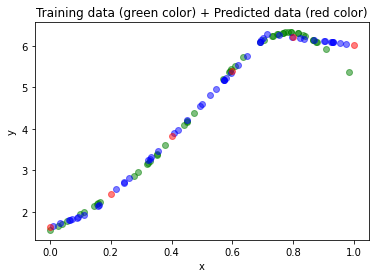

In [ ]:
# Display training data and predicted data graphically
plt.title('Training data (green color) + Predicted data (red color)')

# training data in green color
plt.scatter(X_train, Y_train, color='green',  alpha=0.5)

# validation data in blue color
plt.scatter(X_val, Ŷ_val , color='blue',  alpha=0.5)

# predicted data in blue color
plt.scatter(X_test, Ŷ_test, color='red',  alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()